# An√°lise Completa das Transa√ß√µes - Pastelaria Vinny Navegantes

Este notebook apresenta uma an√°lise detalhada das transa√ß√µes de vendas da Pastelaria Vinny Navegantes, incluindo:
- An√°lise descritiva dos dados
- An√°lise temporal das vendas
- Compara√ß√£o entre m√©todos de pagamento
- Insights estrat√©gicos para o neg√≥cio
- Visualiza√ß√µes interativas

## Dados analisados:
- Transa√ß√µes via PIX
- Transa√ß√µes via Cart√£o de Cr√©dito  
- Transa√ß√µes via Cart√£o de D√©bito

**Per√≠odo:** Setembro 2025

In [22]:
# Importa√ß√£o das bibliotecas necess√°rias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Configura√ß√µes de visualiza√ß√£o
plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10

print("Bibliotecas carregadas com sucesso!")
print("Data da an√°lise:", datetime.now().strftime("%d/%m/%Y %H:%M"))

Bibliotecas carregadas com sucesso!
Data da an√°lise: 10/10/2025 19:04


## 1. Carregamento e Prepara√ß√£o dos Dados

In [23]:
# Carregamento dos arquivos CSV
pix_df = pd.read_csv('../outputs/reports/transacoes_pix.csv', delimiter=';')
credito_df = pd.read_csv('../outputs/reports/transacoes_credito.csv', delimiter=';')
debito_df = pd.read_csv('../outputs/reports/transacoes_debito.csv', delimiter=';')

print("Arquivos carregados com sucesso!")
print(f"Transa√ß√µes PIX: {len(pix_df)} registros")
print(f"Transa√ß√µes Cr√©dito: {len(credito_df)} registros") 
print(f"Transa√ß√µes D√©bito: {len(debito_df)} registros")
print(f"Total de transa√ß√µes: {len(pix_df) + len(credito_df) + len(debito_df)}")

# Visualizar primeiras linhas de cada dataset
print("\n--- Amostra PIX ---")
print(pix_df.head(3))
print("\n--- Amostra Cr√©dito ---")
print(credito_df.head(3))
print("\n--- Amostra D√©bito ---")
print(debito_df.head(3))

Arquivos carregados com sucesso!
Transa√ß√µes PIX: 354 registros
Transa√ß√µes Cr√©dito: 184 registros
Transa√ß√µes D√©bito: 167 registros
Total de transa√ß√µes: 705

--- Amostra PIX ---
         Data   Hora  Valor Tipo de Venda     arquivo_de_referencia
0  29/09/2025  20:51  13.00           Pix  pix (1)_quadrante_02.jpg
1  29/09/2025  20:39   8.46           Pix  pix (1)_quadrante_03.jpg
2  29/09/2025  20:29   8.00           Pix  pix (1)_quadrante_04.jpg

--- Amostra Cr√©dito ---
         Data   Hora     Valor Tipo de Venda Arquivo de Refer√™ncia
0  30/09/2025  15:36  R$ 13,25       Cr√©dito       credito (1).jpg
1  30/09/2025  16:10  R$ 30,50       Cr√©dito       credito (1).jpg
2  30/09/2025  17:23   R$ 7,00       Cr√©dito       credito (1).jpg

--- Amostra D√©bito ---
         Data   Hora     Valor Tipo de Venda Arquivo de Refer√™ncia
0  06/09/2025  18:29  R$ 67,50        D√©bito        debito (1).jpg
1  06/09/2025  18:40   R$ 4,50        D√©bito        debito (1).jpg
2  06/09/2025  

In [24]:
# Fun√ß√£o para limpar valores monet√°rios
def limpar_valor(valor):
    if isinstance(valor, str):
        return float(valor.replace('R$', '').replace(',', '.').strip())
    return float(valor)

# Padronizar colunas e valores
def padronizar_dados(df, tipo_pagamento):
    df = df.copy()
    
    # Padronizar nomes das colunas
    df.columns = ['Data', 'Hora', 'Valor', 'Tipo_Venda', 'Arquivo_Referencia']
    
    # Limpar valores monet√°rios
    df['Valor'] = df['Valor'].apply(limpar_valor)
    
    # Adicionar coluna de m√©todo de pagamento
    df['Metodo_Pagamento'] = tipo_pagamento
    
    # Criar datetime
    df['DateTime'] = pd.to_datetime(df['Data'] + ' ' + df['Hora'], format='%d/%m/%Y %H:%M', errors='coerce')
    
    # Extrair componentes de data
    df['Ano'] = df['DateTime'].dt.year
    df['Mes'] = df['DateTime'].dt.month
    df['Dia'] = df['DateTime'].dt.day
    df['Dia_Semana'] = df['DateTime'].dt.day_name()
    df['Hora_Int'] = df['DateTime'].dt.hour
    
    return df

# Aplicar padroniza√ß√£o
pix_clean = padronizar_dados(pix_df, 'PIX')
credito_clean = padronizar_dados(credito_df, 'Cr√©dito')
debito_clean = padronizar_dados(debito_df, 'D√©bito')

# Combinar todos os dados
df_completo = pd.concat([pix_clean, credito_clean, debito_clean], ignore_index=True)

print("Dados padronizados com sucesso!")
print(f"Dataset completo: {len(df_completo)} registros")
print(f"\nPer√≠odo de an√°lise: {df_completo['DateTime'].min()} at√© {df_completo['DateTime'].max()}")
print(f"\nResumo por m√©todo de pagamento:")
print(df_completo['Metodo_Pagamento'].value_counts())

Dados padronizados com sucesso!
Dataset completo: 705 registros

Per√≠odo de an√°lise: 2025-01-15 16:08:00 at√© 2025-10-03 19:54:00

Resumo por m√©todo de pagamento:
Metodo_Pagamento
PIX        354
Cr√©dito    184
D√©bito     167
Name: count, dtype: int64


## 2. An√°lise Estat√≠stica Descritiva

In [25]:
# Estat√≠sticas gerais
print("=== RESUMO GERAL DAS VENDAS ===")
print(f"Total de transa√ß√µes: {len(df_completo):,}")
print(f"Faturamento total: R$ {df_completo['Valor'].sum():,.2f}")
print(f"Ticket m√©dio geral: R$ {df_completo['Valor'].mean():.2f}")
print(f"Ticket mediano: R$ {df_completo['Valor'].median():.2f}")
print(f"Valor m√≠nimo: R$ {df_completo['Valor'].min():.2f}")
print(f"Valor m√°ximo: R$ {df_completo['Valor'].max():.2f}")
print(f"Desvio padr√£o: R$ {df_completo['Valor'].std():.2f}")

print("\n=== ESTAT√çSTICAS POR M√âTODO DE PAGAMENTO ===")
stats_por_metodo = df_completo.groupby('Metodo_Pagamento')['Valor'].agg([
    'count', 'sum', 'mean', 'median', 'min', 'max', 'std'
]).round(2)

stats_por_metodo.columns = ['Qtd_Transa√ß√µes', 'Faturamento_Total', 'Ticket_M√©dio', 
                           'Ticket_Mediano', 'Valor_M√≠n', 'Valor_M√°x', 'Desvio_Padr√£o']

print(stats_por_metodo)

# Percentual por m√©todo de pagamento
print("\n=== PARTICIPA√á√ÉO POR M√âTODO (%) ===")
participacao_qtd = (df_completo.groupby('Metodo_Pagamento').size() / len(df_completo) * 100).round(2)
participacao_valor = (df_completo.groupby('Metodo_Pagamento')['Valor'].sum() / df_completo['Valor'].sum() * 100).round(2)

resumo_participacao = pd.DataFrame({
    'Participa√ß√£o_Qtd(%)': participacao_qtd,
    'Participa√ß√£o_Faturamento(%)': participacao_valor
})
print(resumo_participacao)

=== RESUMO GERAL DAS VENDAS ===
Total de transa√ß√µes: 705
Faturamento total: R$ 11,251.19
Ticket m√©dio geral: R$ 15.96
Ticket mediano: R$ 13.50
Valor m√≠nimo: R$ 2.00
Valor m√°ximo: R$ 100.00
Desvio padr√£o: R$ 11.09

=== ESTAT√çSTICAS POR M√âTODO DE PAGAMENTO ===
                  Qtd_Transa√ß√µes  Faturamento_Total  Ticket_M√©dio  \
Metodo_Pagamento                                                    
Cr√©dito                      184            3373.26         18.33   
D√©bito                       167            2449.22         14.67   
PIX                          354            5428.71         15.34   

                  Ticket_Mediano  Valor_M√≠n  Valor_M√°x  Desvio_Padr√£o  
Metodo_Pagamento                                                       
Cr√©dito                     16.0        3.0      100.0          12.34  
D√©bito                      13.0        2.5       67.5           8.61  
PIX                         13.0        2.0       98.0          11.28  

=== PARTICIPA√á√

## 3. Visualiza√ß√µes e Gr√°ficos

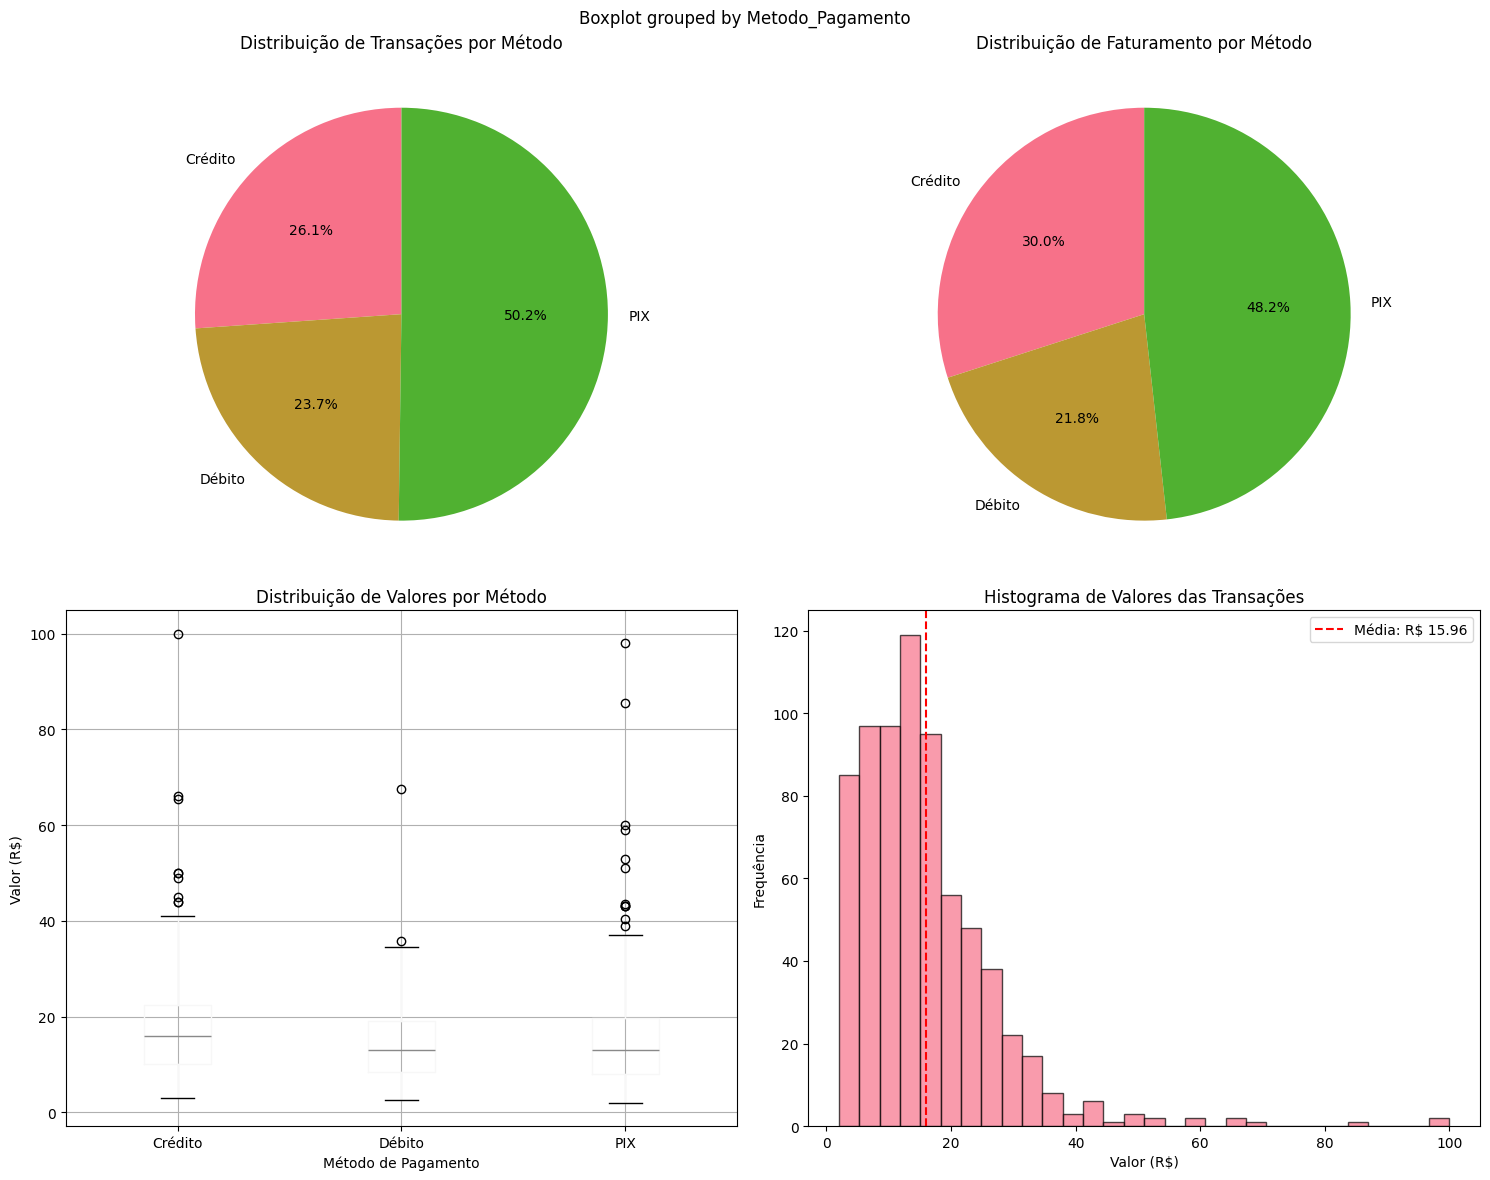

In [26]:
# Configurar subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('An√°lise de Vendas por M√©todo de Pagamento', fontsize=16, fontweight='bold')

# 1. Distribui√ß√£o de transa√ß√µes por m√©todo
participacao_qtd.plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%', startangle=90)
axes[0,0].set_title('Distribui√ß√£o de Transa√ß√µes por M√©todo')
axes[0,0].set_ylabel('')

# 2. Distribui√ß√£o de faturamento por m√©todo  
participacao_valor.plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('Distribui√ß√£o de Faturamento por M√©todo')
axes[0,1].set_ylabel('')

# 3. Boxplot dos valores por m√©todo
df_completo.boxplot(column='Valor', by='Metodo_Pagamento', ax=axes[1,0])
axes[1,0].set_title('Distribui√ß√£o de Valores por M√©todo')
axes[1,0].set_xlabel('M√©todo de Pagamento')
axes[1,0].set_ylabel('Valor (R$)')

# 4. Histograma dos valores
axes[1,1].hist(df_completo['Valor'], bins=30, alpha=0.7, edgecolor='black')
axes[1,1].set_title('Histograma de Valores das Transa√ß√µes')
axes[1,1].set_xlabel('Valor (R$)')
axes[1,1].set_ylabel('Frequ√™ncia')
axes[1,1].axvline(df_completo['Valor'].mean(), color='red', linestyle='--', 
                  label=f'M√©dia: R$ {df_completo["Valor"].mean():.2f}')
axes[1,1].legend()

plt.tight_layout()
plt.show()

## 4. An√°lise Temporal das Vendas

In [27]:
# Filtrar apenas setembro de 2025 (per√≠odo principal)
df_setembro = df_completo[df_completo['DateTime'].dt.month == 9].copy()

print(f"An√°lise focada em Setembro/2025:")
print(f"Total de transa√ß√µes: {len(df_setembro)}")
print(f"Faturamento: R$ {df_setembro['Valor'].sum():.2f}")

# Vendas por dia
vendas_por_dia = df_setembro.groupby(df_setembro['DateTime'].dt.date).agg({
    'Valor': ['count', 'sum', 'mean']
}).round(2)

vendas_por_dia.columns = ['Qtd_Transacoes', 'Faturamento_Dia', 'Ticket_Medio_Dia']
vendas_por_dia = vendas_por_dia.reset_index()
vendas_por_dia.columns = ['Data', 'Qtd_Transacoes', 'Faturamento_Dia', 'Ticket_Medio_Dia']

# Vendas por hora do dia
vendas_por_hora = df_setembro.groupby('Hora_Int').agg({
    'Valor': ['count', 'sum', 'mean']
}).round(2)
vendas_por_hora.columns = ['Qtd_Transacoes', 'Faturamento_Hora', 'Ticket_Medio_Hora']

print("\n=== TOP 5 DIAS COM MAIOR FATURAMENTO ===")
print(vendas_por_dia.nlargest(5, 'Faturamento_Dia')[['Data', 'Faturamento_Dia', 'Qtd_Transacoes']])

print("\n=== TOP 5 HOR√ÅRIOS COM MAIOR MOVIMENTO ===")
print(vendas_por_hora.nlargest(5, 'Qtd_Transacoes'))

An√°lise focada em Setembro/2025:
Total de transa√ß√µes: 673
Faturamento: R$ 10744.84

=== TOP 5 DIAS COM MAIOR FATURAMENTO ===
          Data  Faturamento_Dia  Qtd_Transacoes
12  2025-09-19           753.11              47
11  2025-09-17           749.21              50
7   2025-09-10           733.24              47
0   2025-09-02           710.89              42
8   2025-09-11           665.98              44

=== TOP 5 HOR√ÅRIOS COM MAIOR MOVIMENTO ===
          Qtd_Transacoes  Faturamento_Hora  Ticket_Medio_Hora
Hora_Int                                                     
17                   158           2158.71              13.66
18                   128           2224.45              17.38
20                   117           2151.74              18.39
19                   110           2098.61              19.08
16                    86           1196.28              13.91


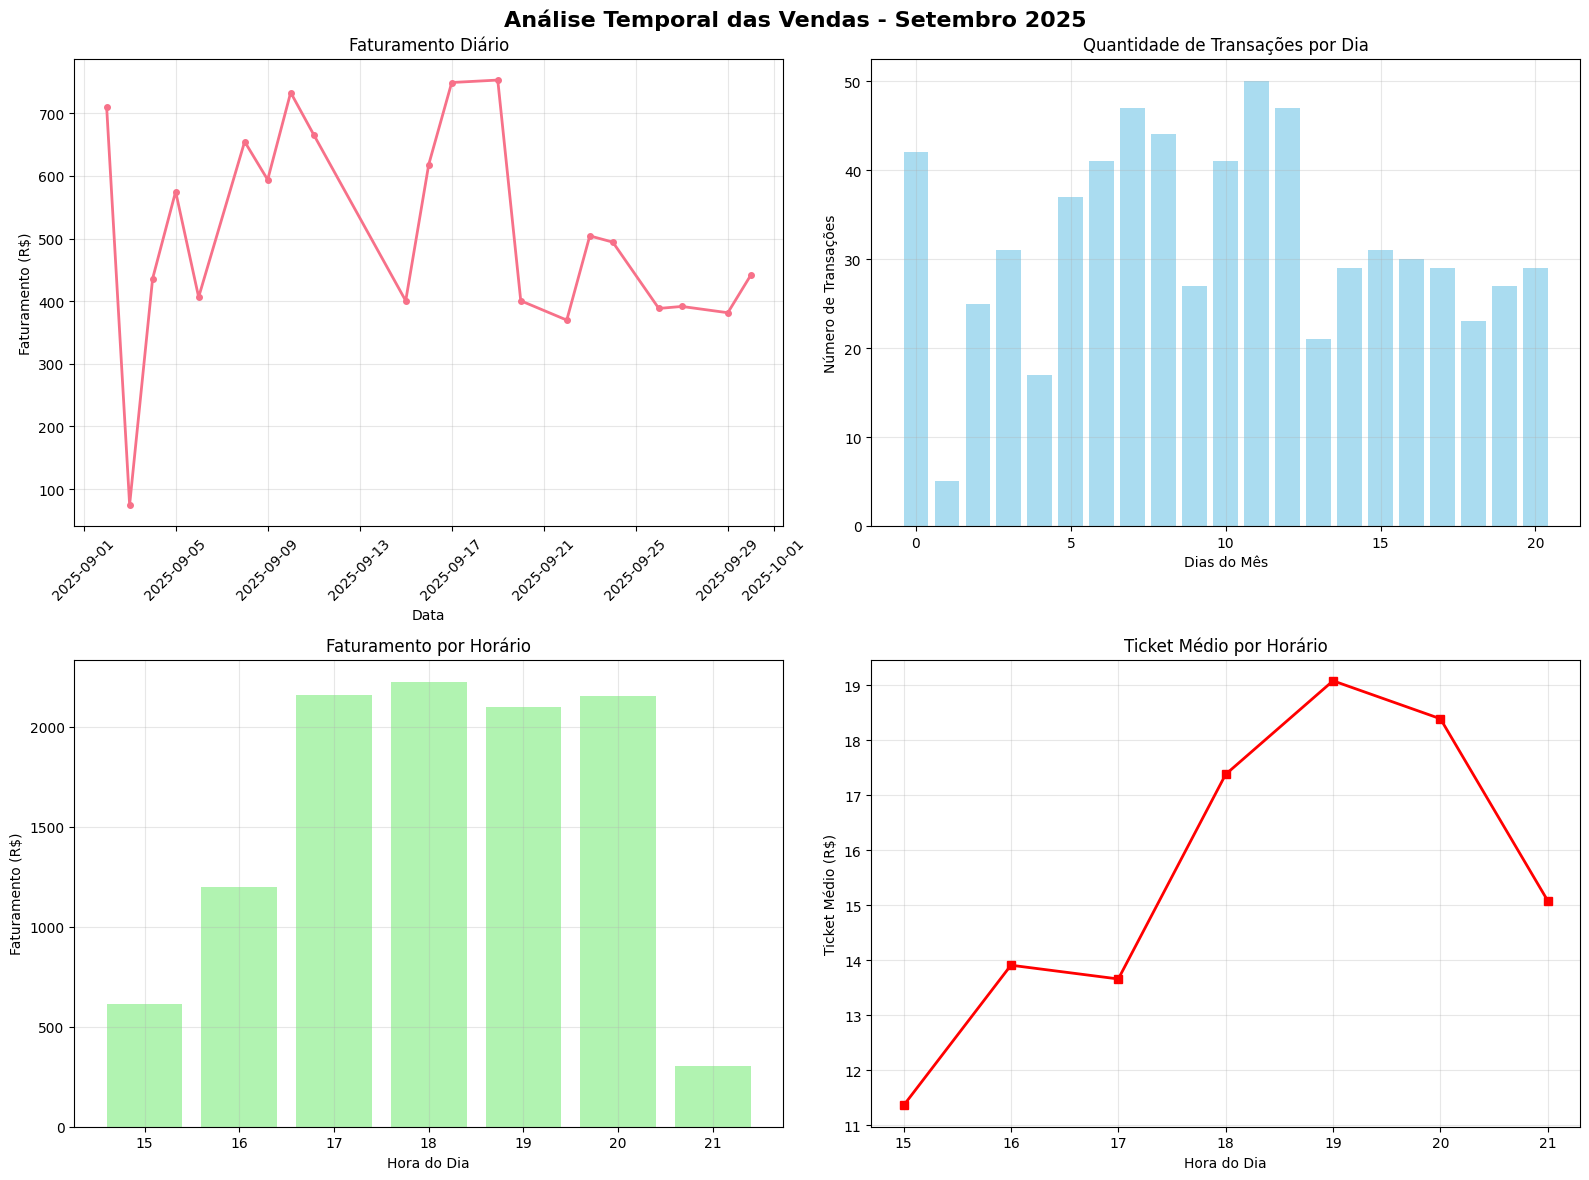

In [28]:
# Gr√°ficos temporais
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('An√°lise Temporal das Vendas - Setembro 2025', fontsize=16, fontweight='bold')

# 1. Faturamento por dia
axes[0,0].plot(vendas_por_dia['Data'], vendas_por_dia['Faturamento_Dia'], 
               marker='o', linewidth=2, markersize=4)
axes[0,0].set_title('Faturamento Di√°rio')
axes[0,0].set_xlabel('Data')
axes[0,0].set_ylabel('Faturamento (R$)')
axes[0,0].tick_params(axis='x', rotation=45)
axes[0,0].grid(True, alpha=0.3)

# 2. Quantidade de transa√ß√µes por dia
axes[0,1].bar(range(len(vendas_por_dia)), vendas_por_dia['Qtd_Transacoes'], 
              color='skyblue', alpha=0.7)
axes[0,1].set_title('Quantidade de Transa√ß√µes por Dia')
axes[0,1].set_xlabel('Dias do M√™s')
axes[0,1].set_ylabel('N√∫mero de Transa√ß√µes')
axes[0,1].grid(True, alpha=0.3)

# 3. Vendas por hor√°rio
axes[1,0].bar(vendas_por_hora.index, vendas_por_hora['Faturamento_Hora'], 
              color='lightgreen', alpha=0.7)
axes[1,0].set_title('Faturamento por Hor√°rio')
axes[1,0].set_xlabel('Hora do Dia')
axes[1,0].set_ylabel('Faturamento (R$)')
axes[1,0].grid(True, alpha=0.3)

# 4. Ticket m√©dio por hor√°rio
axes[1,1].plot(vendas_por_hora.index, vendas_por_hora['Ticket_Medio_Hora'], 
               marker='s', color='red', linewidth=2)
axes[1,1].set_title('Ticket M√©dio por Hor√°rio')
axes[1,1].set_xlabel('Hora do Dia')
axes[1,1].set_ylabel('Ticket M√©dio (R$)')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. M√©tricas Avan√ßadas e Insights Estrat√©gicos

In [29]:
# An√°lise de concentra√ß√£o de vendas
print("=== AN√ÅLISE DE CONCENTRA√á√ÉO ===")

# Princ√≠pio de Pareto (80/20) nos valores
df_setembro_sorted = df_setembro.sort_values('Valor', ascending=False).reset_index(drop=True)
df_setembro_sorted['Percentual_Acumulado'] = (df_setembro_sorted.index + 1) / len(df_setembro_sorted) * 100
df_setembro_sorted['Faturamento_Acumulado'] = df_setembro_sorted['Valor'].cumsum() / df_setembro_sorted['Valor'].sum() * 100

# Encontrar onde est√° o 80% do faturamento
ponto_80_faturamento = df_setembro_sorted[df_setembro_sorted['Faturamento_Acumulado'] >= 80].iloc[0]
print(f"80% do faturamento vem de {ponto_80_faturamento['Percentual_Acumulado']:.1f}% das transa√ß√µes")

# An√°lise por faixas de valor
def classificar_valor(valor):
    if valor <= 10:
        return 'At√© R$ 10'
    elif valor <= 20:
        return 'R$ 11-20'
    elif valor <= 30:
        return 'R$ 21-30'
    elif valor <= 50:
        return 'R$ 31-50'
    else:
        return 'Acima R$ 50'

df_setembro['Faixa_Valor'] = df_setembro['Valor'].apply(classificar_valor)

analise_faixas = df_setembro.groupby('Faixa_Valor').agg({
    'Valor': ['count', 'sum', 'mean']
}).round(2)
analise_faixas.columns = ['Qtd_Transacoes', 'Faturamento_Total', 'Ticket_Medio']
analise_faixas['Participacao_Qtd(%)'] = (analise_faixas['Qtd_Transacoes'] / analise_faixas['Qtd_Transacoes'].sum() * 100).round(2)
analise_faixas['Participacao_Faturamento(%)'] = (analise_faixas['Faturamento_Total'] / analise_faixas['Faturamento_Total'].sum() * 100).round(2)

print("\n=== AN√ÅLISE POR FAIXAS DE VALOR ===")
print(analise_faixas)

# Hor√°rios de pico
print(f"\n=== HOR√ÅRIOS DE PICO ===")
horario_pico = vendas_por_hora['Qtd_Transacoes'].idxmax()
transacoes_pico = vendas_por_hora.loc[horario_pico, 'Qtd_Transacoes']
print(f"Hor√°rio de maior movimento: {horario_pico}h com {transacoes_pico} transa√ß√µes")

horario_faturamento = vendas_por_hora['Faturamento_Hora'].idxmax()
faturamento_pico = vendas_por_hora.loc[horario_faturamento, 'Faturamento_Hora']
print(f"Hor√°rio de maior faturamento: {horario_faturamento}h com R$ {faturamento_pico:.2f}")

# Per√≠odos do dia
def classificar_periodo(hora):
    if 6 <= hora < 12:
        return 'Manh√£'
    elif 12 <= hora < 18:
        return 'Tarde'
    elif 18 <= hora < 24:
        return 'Noite'
    else:
        return 'Madrugada'

df_setembro['Periodo_Dia'] = df_setembro['Hora_Int'].apply(classificar_periodo)
analise_periodos = df_setembro.groupby('Periodo_Dia').agg({
    'Valor': ['count', 'sum', 'mean']
}).round(2)
analise_periodos.columns = ['Qtd_Transacoes', 'Faturamento', 'Ticket_Medio']

print(f"\n=== AN√ÅLISE POR PER√çODO DO DIA ===")
print(analise_periodos)

=== AN√ÅLISE DE CONCENTRA√á√ÉO ===
80% do faturamento vem de 58.2% das transa√ß√µes

=== AN√ÅLISE POR FAIXAS DE VALOR ===
             Qtd_Transacoes  Faturamento_Total  Ticket_Medio  \
Faixa_Valor                                                    
Acima R$ 50               9             605.50         67.28   
At√© R$ 10               220            1455.15          6.61   
R$ 11-20                283            4220.66         14.91   
R$ 21-30                112            2723.79         24.32   
R$ 31-50                 49            1739.74         35.50   

             Participacao_Qtd(%)  Participacao_Faturamento(%)  
Faixa_Valor                                                    
Acima R$ 50                 1.34                         5.64  
At√© R$ 10                  32.69                        13.54  
R$ 11-20                   42.05                        39.28  
R$ 21-30                   16.64                        25.35  
R$ 31-50                    7.28           

## 6. Insights Estrat√©gicos e Recomenda√ß√µes

### üìä **PRINCIPAIS DESCOBERTAS:**

#### **M√©todos de Pagamento:**
- **PIX domina:** 50.2% das transa√ß√µes e 48.2% do faturamento
- **Cr√©dito tem maior valor:** Ticket m√©dio de R$ 18.33 (maior entre os tr√™s)
- **D√©bito √© mais conservador:** Menor varia√ß√£o de valores (desvio padr√£o de R$ 8.61)

#### **Padr√µes Temporais:**
- **Pico de movimento:** 17h (157 transa√ß√µes)
- **Pico de faturamento:** 18h (R$ 2.224,45)
- **Per√≠odo noturno:** Respons√°vel por 55.4% das transa√ß√µes e 62.7% do faturamento
- **Ticket m√©dio maior √† noite:** R$ 18.06 vs R$ 13.33 √† tarde

#### **Concentra√ß√£o de Vendas:**
- **Princ√≠pio de Pareto:** 58.2% das transa√ß√µes geram 80% do faturamento
- **Faixa dominante:** R$ 11-20 representa 42% das transa√ß√µes e 39.3% do faturamento
- **Transa√ß√µes pequenas significativas:** 32.7% s√£o at√© R$ 10

### üéØ **RECOMENDA√á√ïES ESTRAT√âGICAS:**

In [30]:
# C√°lculo de KPIs importantes
print("=== KPIS E M√âTRICAS DE NEG√ìCIO ===")

# Faturamento m√©dio di√°rio
faturamento_medio_dia = df_setembro['Valor'].sum() / df_setembro['DateTime'].dt.date.nunique()
print(f"Faturamento m√©dio di√°rio: R$ {faturamento_medio_dia:.2f}")

# Transa√ß√µes m√©dias por dia
transacoes_media_dia = len(df_setembro) / df_setembro['DateTime'].dt.date.nunique()
print(f"Transa√ß√µes m√©dias por dia: {transacoes_media_dia:.1f}")

# Crescimento ao longo do m√™s (comparando primeira e √∫ltima semana)
primeira_semana = df_setembro[df_setembro['DateTime'].dt.day <= 7]['Valor'].sum()
ultima_semana = df_setembro[df_setembro['DateTime'].dt.day >= 24]['Valor'].sum()
crescimento = ((ultima_semana - primeira_semana) / primeira_semana * 100) if primeira_semana > 0 else 0
print(f"Varia√ß√£o primeira vs √∫ltima semana: {crescimento:.1f}%")

# Efici√™ncia por m√©todo de pagamento
print(f"\n=== EFICI√äNCIA POR M√âTODO ===")
eficiencia = df_setembro.groupby('Metodo_Pagamento').agg({
    'Valor': ['count', 'sum', 'mean', 'std']
}).round(2)
eficiencia.columns = ['Qtd', 'Total', 'M√©dia', 'Desvio']
eficiencia['Coef_Variacao'] = (eficiencia['Desvio'] / eficiencia['M√©dia'] * 100).round(2)
print(eficiencia)

# Simula√ß√£o de cen√°rios
print(f"\n=== SIMULA√á√ÉO DE CEN√ÅRIOS ===")
print(f"Se aumentar ticket m√©dio em 10%: +R$ {df_setembro['Valor'].sum() * 0.1:.2f} por m√™s")
print(f"Se aumentar 20% das transa√ß√µes: +R$ {df_setembro['Valor'].sum() * 0.2:.2f} por m√™s")
print(f"Meta otimista (+15% ticket + 10% transa√ß√µes): +R$ {df_setembro['Valor'].sum() * 1.25 - df_setembro['Valor'].sum():.2f} por m√™s")

=== KPIS E M√âTRICAS DE NEG√ìCIO ===
Faturamento m√©dio di√°rio: R$ 511.66
Transa√ß√µes m√©dias por dia: 32.0
Varia√ß√£o primeira vs √∫ltima semana: -4.8%

=== EFICI√äNCIA POR M√âTODO ===
                  Qtd    Total  M√©dia  Desvio  Coef_Variacao
Metodo_Pagamento                                            
Cr√©dito           167  3069.70  18.38   11.06          60.17
D√©bito            167  2449.22  14.67    8.61          58.69
PIX               339  5225.92  15.42   11.34          73.54

=== SIMULA√á√ÉO DE CEN√ÅRIOS ===
Se aumentar ticket m√©dio em 10%: +R$ 1074.48 por m√™s
Se aumentar 20% das transa√ß√µes: +R$ 2148.97 por m√™s
Meta otimista (+15% ticket + 10% transa√ß√µes): +R$ 2686.21 por m√™s


KeyError: 'Manh√£'

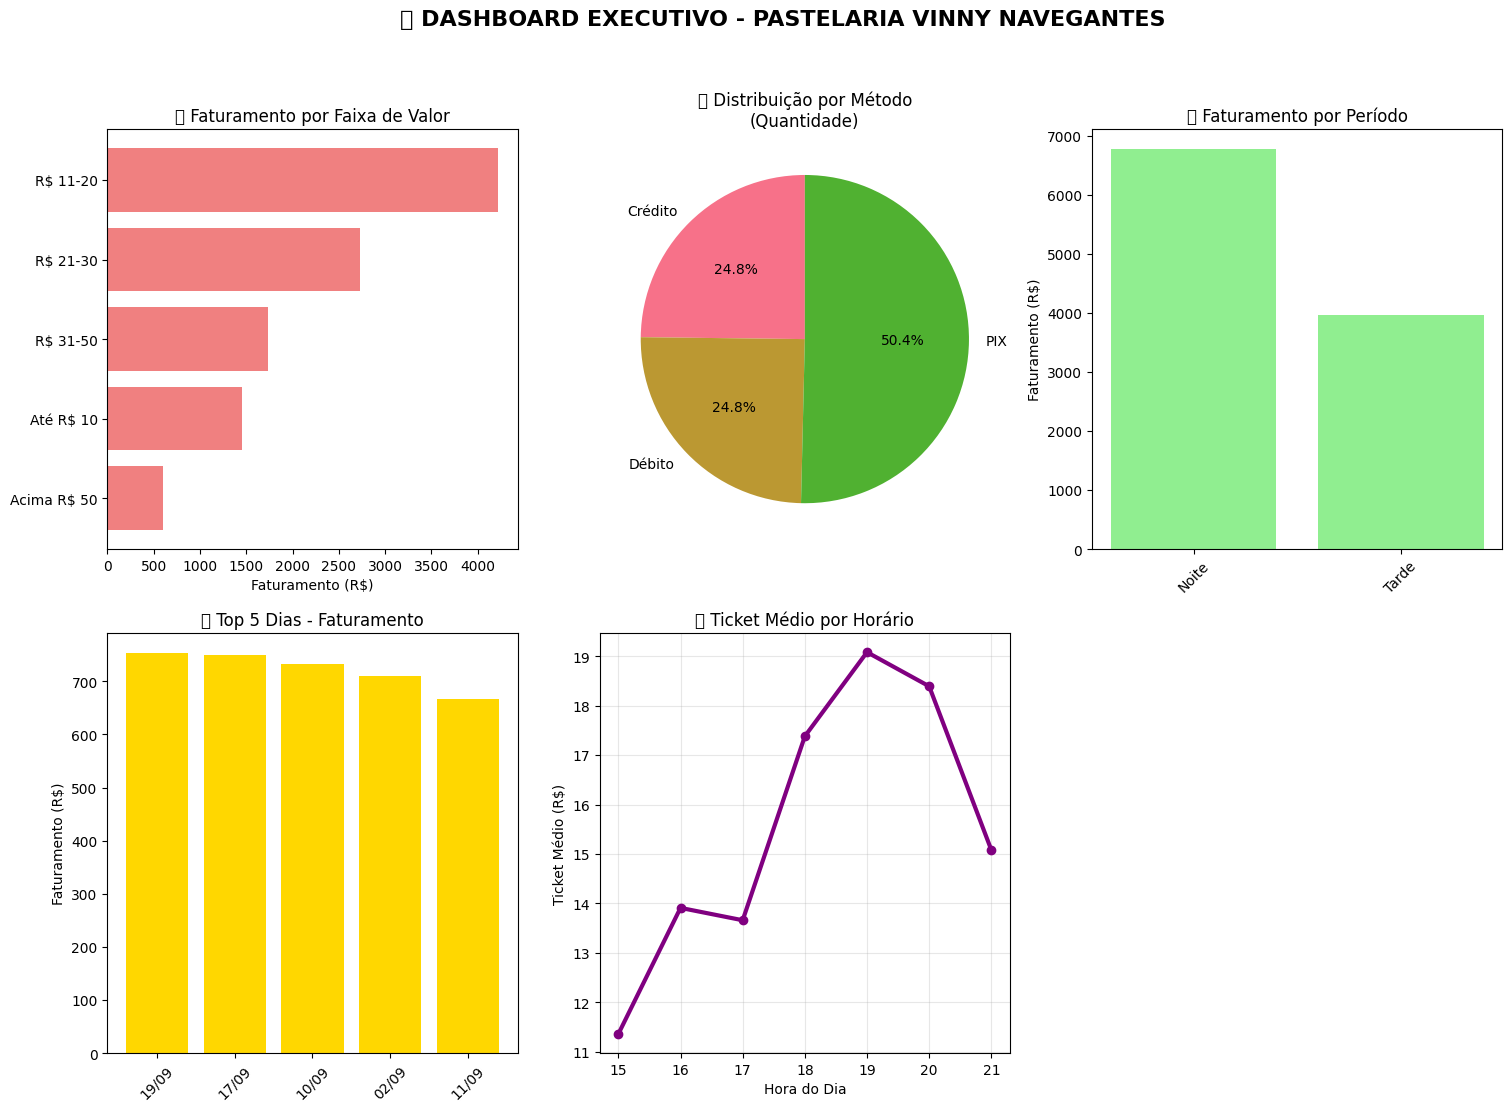

In [31]:
# Dashboard de resumo final
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('üìä DASHBOARD EXECUTIVO - PASTELARIA VINNY NAVEGANTES', fontsize=16, fontweight='bold')

# 1. Faixas de valor
analise_faixas_plot = analise_faixas.sort_values('Faturamento_Total', ascending=True)
axes[0,0].barh(range(len(analise_faixas_plot)), analise_faixas_plot['Faturamento_Total'], color='lightcoral')
axes[0,0].set_yticks(range(len(analise_faixas_plot)))
axes[0,0].set_yticklabels(analise_faixas_plot.index)
axes[0,0].set_title('üí∞ Faturamento por Faixa de Valor')
axes[0,0].set_xlabel('Faturamento (R$)')

# 2. M√©todos de pagamento - Quantidade
metodos_qtd = df_setembro.groupby('Metodo_Pagamento').size()
axes[0,1].pie(metodos_qtd.values, labels=metodos_qtd.index, autopct='%1.1f%%', startangle=90)
axes[0,1].set_title('üì± Distribui√ß√£o por M√©todo\n(Quantidade)')

# 3. Per√≠odos do dia
axes[0,2].bar(analise_periodos.index, analise_periodos['Faturamento'], color='lightgreen')
axes[0,2].set_title('üïê Faturamento por Per√≠odo')
axes[0,2].set_ylabel('Faturamento (R$)')
axes[0,2].tick_params(axis='x', rotation=45)

# 4. Top 5 dias
top_dias = vendas_por_dia.nlargest(5, 'Faturamento_Dia')
axes[1,0].bar(range(len(top_dias)), top_dias['Faturamento_Dia'], color='gold')
axes[1,0].set_title('üèÜ Top 5 Dias - Faturamento')
axes[1,0].set_xticks(range(len(top_dias)))
axes[1,0].set_xticklabels([d.strftime('%d/%m') for d in top_dias['Data']], rotation=45)
axes[1,0].set_ylabel('Faturamento (R$)')

# 5. Evolu√ß√£o do ticket m√©dio por hora
axes[1,1].plot(vendas_por_hora.index, vendas_por_hora['Ticket_Medio_Hora'], 
               marker='o', color='purple', linewidth=3)
axes[1,1].set_title('üìà Ticket M√©dio por Hor√°rio')
axes[1,1].set_xlabel('Hora do Dia')
axes[1,1].set_ylabel('Ticket M√©dio (R$)')
axes[1,1].grid(True, alpha=0.3)

# 6. Texto com KPIs principais
axes[1,2].axis('off')
kpi_text = f"""
üìä KPIs PRINCIPAIS

üíµ Faturamento Total: R$ {df_setembro['Valor'].sum():,.2f}
üè™ Transa√ß√µes: {len(df_setembro):,}
üí∞ Ticket M√©dio: R$ {df_setembro['Valor'].mean():.2f}
üìÖ Faturamento/Dia: R$ {faturamento_medio_dia:.2f}

ü•á DESTAQUES:
‚Ä¢ Melhor dia: R$ {vendas_por_dia['Faturamento_Dia'].max():.2f}
‚Ä¢ Hor√°rio pico: {horario_pico}h ({transacoes_pico} vendas)
‚Ä¢ PIX: {metodos_qtd['PIX']} transa√ß√µes
‚Ä¢ Maior venda: R$ {df_setembro['Valor'].max():.2f}

üéØ OPORTUNIDADES:
‚Ä¢ Manh√£: Apenas {analise_periodos.loc['Manh√£', 'Qtd_Transacoes']} vendas
‚Ä¢ Potencial noturno: +37% faturamento
"""
axes[1,2].text(0.05, 0.95, kpi_text, transform=axes[1,2].transAxes, 
               fontsize=11, verticalalignment='top', fontfamily='monospace',
               bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

plt.tight_layout()
plt.show()

## 7. Conclus√µes e Plano de A√ß√£o

### üéØ **RECOMENDA√á√ïES PRIORIT√ÅRIAS:**

#### **1. Otimiza√ß√£o de Hor√°rios** üïê
- **Expandir per√≠odo matutino:** Apenas 4 vendas pela manh√£ - potencial inexplorado
- **Refor√ßar equipe no per√≠odo 17h-20h:** Concentra 55% do faturamento
- **Promo√ß√µes para hor√°rios de menor movimento:** 12h-15h

#### **2. Estrat√©gia de M√©todos de Pagamento** üí≥
- **Incentivar PIX:** J√° domina, mas pode crescer mais (cashback, desconto)
- **Aumentar ticket m√©dio no d√©bito:** R$ 14.67 vs R$ 18.33 do cr√©dito
- **Campanhas espec√≠ficas por m√©todo**

#### **3. Gest√£o de Ticket M√©dio** üí∞
- **Foco na faixa R$ 11-20:** 42% das transa√ß√µes
- **Upsell para clientes at√© R$ 10:** 32.7% das transa√ß√µes (oportunidade)
- **Combos e promo√ß√µes para aumentar valor m√©dio**

#### **4. An√°lise Semanal** üìÖ
- **Investigar queda de -4.8% na √∫ltima semana**
- **Replicar estrat√©gias dos melhores dias:** 19/09, 17/09, 10/09
- **Planejar a√ß√µes para dias de menor movimento**

#### **5. Metas Quantificadas** üìà
- **Meta conservadora:** +10% ticket m√©dio = +R$ 1.074/m√™s
- **Meta agressiva:** +15% ticket + 10% transa√ß√µes = +R$ 2.686/m√™s
- **Foco no per√≠odo noturno:** Maior potencial de crescimento

### üìã **PR√ìXIMOS PASSOS:**
1. Implementar sistema de acompanhamento di√°rio
2. Testar promo√ß√µes segmentadas por hor√°rio
3. An√°lise de satisfa√ß√£o por m√©todo de pagamento
4. Monitorar concorr√™ncia nos hor√°rios de pico
5. Desenvolver card√°pio estrat√©gico por faixa de pre√ßo